<a href="https://colab.research.google.com/github/Minhhhh29/AI_1/blob/main/BTVN1_CNN_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from PIL import Image
import matplotlib.pyplot as plt

# Đường dẫn đến folder ảnh chứa 2 thư mục con: Nghi và Minh
image_folder = '/content/drive/MyDrive/Dataset AI CNN'

# Cài đặt
img_size = 128
data = []
labels = []
label_map = {}  # ví dụ {0: 'Minh', 1: 'Nghi'}

# Load ảnh và gán nhãn
for idx, label_name in enumerate(sorted(os.listdir(image_folder))):
    label_path = os.path.join(image_folder, label_name)
    if not os.path.isdir(label_path):
        continue
    label_map[idx] = label_name
    for img_file in os.listdir(label_path):
        try:
            img_path = os.path.join(label_path, img_file)
            img = Image.open(img_path).convert('RGB')
            img = img.resize((img_size, img_size))
            img_array = np.array(img)
            data.append(img_array)
            labels.append(idx)
        except Exception as e:
            print(f"Lỗi khi load ảnh {img_file}: {e}")

# Chuẩn hóa dữ liệu
data = np.array(data).astype('float32') / 255.0
labels = to_categorical(labels, num_classes=len(label_map))

# Chia tập train/test
x_train, x_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42, stratify=labels
)

# Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(x_train)

# Xây mô hình
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(label_map), activation='softmax'))

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Huấn luyện
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    epochs=10,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]
)

# Đánh giá
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\n Độ chính xác trên tập test: {test_acc * 100:.2f}%')

print("\n Nhãn tương ứng:")
print(label_map)

# Dự đoán thử 1 ảnh mới
test_img_path = '/content/test_face.jpg'  # thay bằng đường dẫn ảnh thử nghiệm

try:
    img = Image.open(test_img_path).convert('RGB')
    img = img.resize((img_size, img_size))
    img_array = np.array(img).astype('float32') / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_label = np.argmax(prediction)
    confidence = np.max(prediction)

    print(f"\n Dự đoán ảnh mới: {label_map[predicted_label]} (Độ tin cậy: {confidence:.2f})")

    # Hiển thị ảnh
    plt.imshow(Image.open(test_img_path))
    plt.title(f"Dự đoán: {label_map[predicted_label]} ({confidence:.2f})")
    plt.axis('off')
    plt.show()

except Exception as e:
    print(f"Lỗi khi load ảnh dự đoán: {e}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.4860 - loss: 0.8196 - val_accuracy: 0.9688 - val_loss: 0.5586
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.7396 - loss: 0.5975 - val_accuracy: 1.0000 - val_loss: 0.2741
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.9373 - loss: 0.3010 - val_accuracy: 1.0000 - val_loss: 0.0190
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.9632 - loss: 0.1146 - val_accuracy: 1.0000 - val_loss: 0.0166
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 995ms/step - accuracy: 0.9540 - loss: 0.1003 - val_accuracy: 1.0000 - val_loss: 8.8800e-04
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.9885 - loss: 0.0321 - val_accuracy: 1.0000 - val_loss: 1.3872e-04
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 980ms/step - accuracy: 0.9916 - loss: 0.0219 - val_accuracy: 1.0000 - val_loss: 8.1505e-04
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.9916 - loss: 0.0217 - val_accuracy: 1.0000 - val_loss: 0.004

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


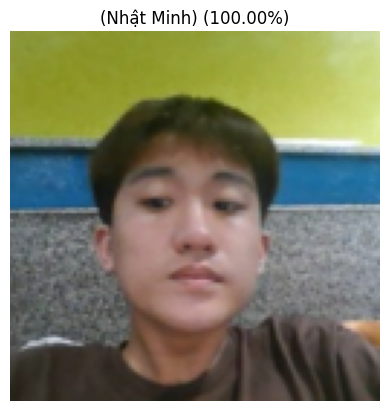

(Nhật Minh) (100.00%)


In [45]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

# Đường dẫn đến ảnh cần dự đoán
new_image_path = '/content/65.jpg'

img_size = 128
try:
    # Tiền xử lý ảnh
    img = Image.open(new_image_path).convert('RGB')  # Chuyển sang RGB
    img = img.resize((img_size, img_size))
    img_array = np.array(img).reshape(1, img_size, img_size, 3).astype('float32') / 255

    # Dự đoán
    prediction = model.predict(img_array)
    predicted_label_index = np.argmax(prediction)
    confidence = np.max(prediction) * 100
    predicted_name = label_map[predicted_label_index]

    # Hiển thị ảnh và kết quả
    plt.imshow(img)
    plt.axis('off')


    if predicted_name.lower() == 'minh':
        title = f'Đây là Minh ({confidence:.2f}%)'
    elif predicted_name.lower() == 'nghi':
        title = f'Đây là Nghi ({confidence:.2f}%)'
    else:
        title = f'({predicted_name}) ({confidence:.2f}%)'

    plt.title(title)
    plt.show()

    print(title)

except FileNotFoundError:
    print(f"Không tìm thấy ảnh tại đường dẫn: {new_image_path}")
except Exception as e:
    print(f"Lỗi khi xử lý ảnh: {e}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


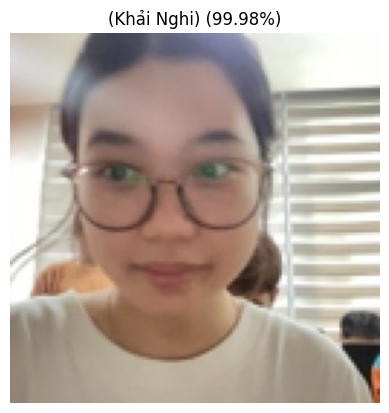

(Khải Nghi) (99.98%)


In [46]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

# Đường dẫn đến ảnh cần dự đoán
new_image_path = '/content/21.jpg'

img_size = 128

try:
    # Tiền xử lý ảnh
    img = Image.open(new_image_path).convert('RGB')  # Chuyển sang RGB
    img = img.resize((img_size, img_size))
    img_array = np.array(img).reshape(1, img_size, img_size, 3).astype('float32') / 255

    # Dự đoán
    prediction = model.predict(img_array)
    predicted_label_index = np.argmax(prediction)
    confidence = np.max(prediction) * 100
    predicted_name = label_map[predicted_label_index]

    # Hiển thị ảnh và kết quả
    plt.imshow(img)
    plt.axis('off')


    if predicted_name.lower() == 'minh':
        title = f'Đây là Minh ({confidence:.2f}%)'
    elif predicted_name.lower() == 'nghi':
        title = f'Đây là Nghi ({confidence:.2f}%)'
    else:
        title = f'({predicted_name}) ({confidence:.2f}%)'

    plt.title(title)
    plt.show()

    print(title)

except FileNotFoundError:
    print(f"Không tìm thấy ảnh tại đường dẫn: {new_image_path}")
except Exception as e:
    print(f"Lỗi khi xử lý ảnh: {e}")
